<a href="https://colab.research.google.com/github/woodenbirds/cs182/blob/master/lambda_diffusion_with_lora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/LambdaLabsML/lambda-diffusers.git

Cloning into 'lambda-diffusers'...
remote: Enumerating objects: 331, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 331 (delta 50), reused 49 (delta 20), pack-reused 227
Receiving objects: 100% (331/331), 12.57 MiB | 30.37 MiB/s, done.
Resolving deltas: 100% (144/144), done.


In [ ]:
%cd lambda-diffusers/

/content/lambda-diffusers


安装命令：https://codeleading.com/article/59406163898/

In [ ]:
!python setup.py build
!python setup.py install

In [ ]:
!pip uninstall diffusers
!pip install diffusers

In [ ]:
import torch
from diffusers import StableDiffusionPipeline
from torch import autocast

pipe = StableDiffusionPipeline.from_pretrained("lambdalabs/sd-pokemon-diffusers", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.65k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/279 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/522 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


RuntimeError: ignored

In [ ]:
import matplotlib.pyplot as plt

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


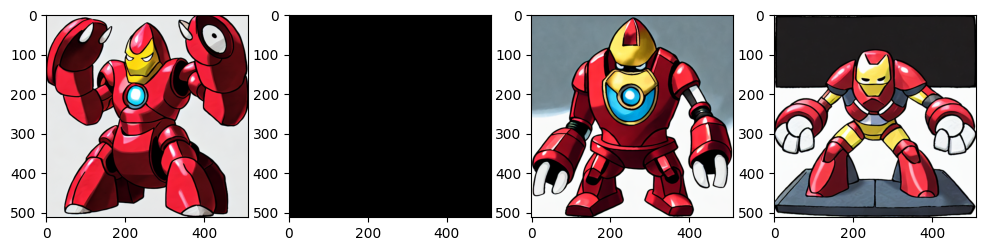

In [ ]:
prompt = "Iron Man"
scale = 10
n_samples = 4

# Sometimes the nsfw checker is confused by the Pokémon images, you can disable
# it at your own risk here
disable_safety = False

if disable_safety:
  def null_safety(images, **kwargs):
      return images, False
  pipe.safety_checker = null_safety

with autocast("cuda"):
  images = pipe(n_samples*[prompt], guidance_scale=scale).images

fig = plt.figure(figsize=(12,3))
for idx, img in enumerate(images):
  plt.subplot(1, n_samples, idx+1)
  plt.imshow(img)
plt.show()

In [ ]:
print(img)

<PIL.Image.Image image mode=RGB size=512x512 at 0x7A73039A5A80>


### Load new datasets
- Apple
- Google
- Facebook
- Twitter



In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/DeepLearning/CS182_Final_Proj/full_emoji.csv")

In [ ]:
df_Apple = df[['name']]
for i in range(len(df_Apple)):
  # df_Apple.loc[i, 'path'] = "/content/drive/MyDrive/DeepLearning/CS182_Final_Proj/data/Apple/" + str(i) + ".jpg"
  df_Apple.loc[i, 'path'] = str(i) + ".jpg"

df_Apple.to_csv("/content/drive/MyDrive/DeepLearning/CS182_Final_Proj/apple_emoji.csv", index=False)

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
import os

class TextImageDataset(Dataset):
    def __init__(self, csv_file, root_dir, tokenizer, transform=None):
        """
        csv_file (string): 包含描述和图像路径的CSV文件的路径。
        root_dir (string): 包含所有图像的目录路径。
        tokenizer: 用于文本的分词器。
        transform (callable, optional): 应用于图像的可选转换。
        """
        self.data_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.tokenizer = tokenizer
        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir, self.data_frame.iloc[idx, 1])
        image = Image.open(img_name)

        if self.transform:
            image = self.transform(image)

        text = self.data_frame.iloc[idx, 0]
        # text = self.tokenizer.encode(text)
        encoded_text = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,  # 添加特殊的Token
            max_length=512,          # 设定最大长度
            padding='max_length',    # 进行填充
            truncation=True,         # 进行截断
            return_attention_mask=True,
            return_tensors='pt'      # 返回PyTorch张量
        )

        sample = {'text': text, 'encoded_text': encoded_text, 'image': image}

        return sample

# 分词器
from transformers import AutoTokenizer
# 选择合适的预训练分词器，例如'BERT'的分词器
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# 图像转换
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 创建自定义数据集
dataset = TextImageDataset(csv_file='/content/drive/MyDrive/DeepLearning/CS182_Final_Proj/apple_emoji.csv',
                           root_dir='/content/drive/MyDrive/DeepLearning/CS182_Final_Proj/data/Apple',
                           tokenizer=tokenizer, transform=transform)

batch_size = 10
# 创建数据加载器
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
for batch in train_loader:
  # print(batch['text'])
  print(batch['encoded_text']['input_ids'].shape)
  # print(batch['image'])
  break

torch.Size([10, 1, 512])


### Define LoRA & modified model

In [ ]:
!pip install loralib

LoRA quick start

In [ ]:
import loralib as lora
import torch
import torch.nn as nn
import torch.optim as optim
import time

in_dim = 512
out_dim = 256 * 256 * 3

class LoRALayer(nn.Module):
    def __init__(self, input_dim, output_dim, rank):
        super(LoRALayer, self).__init__()
        # 初始化LoRA参数
        self.lora_A = nn.Parameter(torch.randn(input_dim, rank))
        self.lora_B = nn.Parameter(torch.zeros(rank, output_dim))

    def forward(self, x):
        # 应用LoRA适应
        delta_weight = self.lora_A @ self.lora_B
        x = x.squeeze(1)
        x = x.to(dtype=torch.float)
        return x @ delta_weight

class ModifiedModel(nn.Module):
    def __init__(self, rank=5, scale=10):
        super(ModifiedModel, self).__init__()
        # 初始化LoRA参数
        self.lora_layer = LoRALayer(in_dim, out_dim, rank)

    def forward(self, text, x):
        # 通过基础模型
        with autocast("cuda"):
          y1 = pipe(text, guidance_scale=scale).images
        y1 = torch.stack([transform(image) for image in y1])
        # 应用LoRA层
        y2 = self.lora_layer.forward(x)
        N, C, H, W = y1.shape
        y2 = y2.to(y1.dtype)
        y2 = y2.view(N, C, H, W)
        return y1 + y2

['mountain', 'waffle', 'construction worker', 'computer disk', 'black circle', 'closed book', 'man fairy', 'flag: French Polynesia', 'love hotel', 'man rowing boat']


  0%|          | 0/50 [00:00<?, ?it/s]

OutOfMemoryError: ignored

### Training

In [ ]:
# This sets requires_grad to False for all parameters without the string "lora_" in their names
finalModel = ModifiedModel()
lora.mark_only_lora_as_trainable(finalModel)

# 创建优化器，只包含LoRA层的参数
optimizer = optim.Adam(finalModel.lora_layer.parameters(), lr=0.01)

# 损失函数，例如均方误差（MSE）损失
criterion = nn.MSELoss()

# Training loop
num_epochs = 5  # 训练的轮数
t0 = time.time()
for epoch in range(num_epochs):
    for batch in train_loader:
        inputs_text = batch['text']
        inputs_tensor = batch['encoded_text']['input_ids']
        targets = batch['image']
        print(inputs_text)
        # 清除之前的梯度
        optimizer.zero_grad()

        # 前向传播
        outputs = finalModel.forward(inputs_text, inputs_tensor)

        # 计算损失
        loss = criterion(outputs, targets)

        # 反向传播
        loss.backward()

        # 更新参数
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Running time so far: {time.time() - t0}")



---

notes



In [ ]:
import torch
import torch.nn as nn

def baseModel(prompt, scale):
  disable_safety = False

  if disable_safety:
    def null_safety(images, **kwargs):
        return images, False
    pipe.safety_checker = null_safety

  with autocast("cuda"):
    img = pipe(prompt, guidance_scale=scale).images

  return img


class LoRALayer(nn.Module):
    def __init__(self, input_dim, output_dim, rank):
        super(LoRALayer, self).__init__()
        # 初始化LoRA参数
        self.lora_A = nn.Parameter(torch.randn(input_dim, rank))
        self.lora_B = nn.Parameter(torch.zeros(rank, output_dim))

    def forward(self, x):
        # 应用LoRA适应
        delta_weight = self.lora_A @ self.lora_B
        return x @ delta_weight

class ModifiedModel(nn.Module):
    def __init__(self, input_dim, output_dim, rank, scale=10):
        super(ModifiedModel, self).__init__()
        self.lora_layer = LoRALayer(input_dim, output_dim, rank)

    def forward(self, x):
        # 通过基础模型
        y1 = baseModel(x, scale)
        # 应用LoRA层
        y2 = self.lora_layer(x)
        return y1 + y2


# 示例：用LoRA适应一个简单的线性模型
modified_model = ModifiedModel(10, 10, rank=5)

In [ ]:
import torch.optim as optim
import torch.utils.data as data

# 确保基础模型的参数不会更新
for param in modified_model.base_model.parameters():
    param.requires_grad = False

# 创建优化器，只包含LoRA层的参数
optimizer = optim.Adam(modified_model.lora_layer.parameters(), lr=0.001)

# 损失函数，例如均方误差（MSE）损失
criterion = nn.MSELoss()

# 训练循环
num_epochs = 10  # 训练的轮数
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        # 清除之前的梯度
        optimizer.zero_grad()

        # 前向传播
        outputs = modified_model(inputs)

        # 计算损失
        loss = criterion(outputs, targets)

        # 反向传播
        loss.backward()

        # 更新参数
        optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")